## <div style="direction:rtl;text-align:center;font-family:B Lotus, B Nazanin, Tahoma"> فاطمه حبیبی مقدم</div>

<div style="padding:20px;
            color:white;
            margin:10;
            font-size:250%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700">DIP Final Projects</div>

<div style="padding:20px;
            color:darkblue;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:white;
            overflow:hidden;
            font-weight:700">Motion Detection (Using Surveillance Camera)</div>

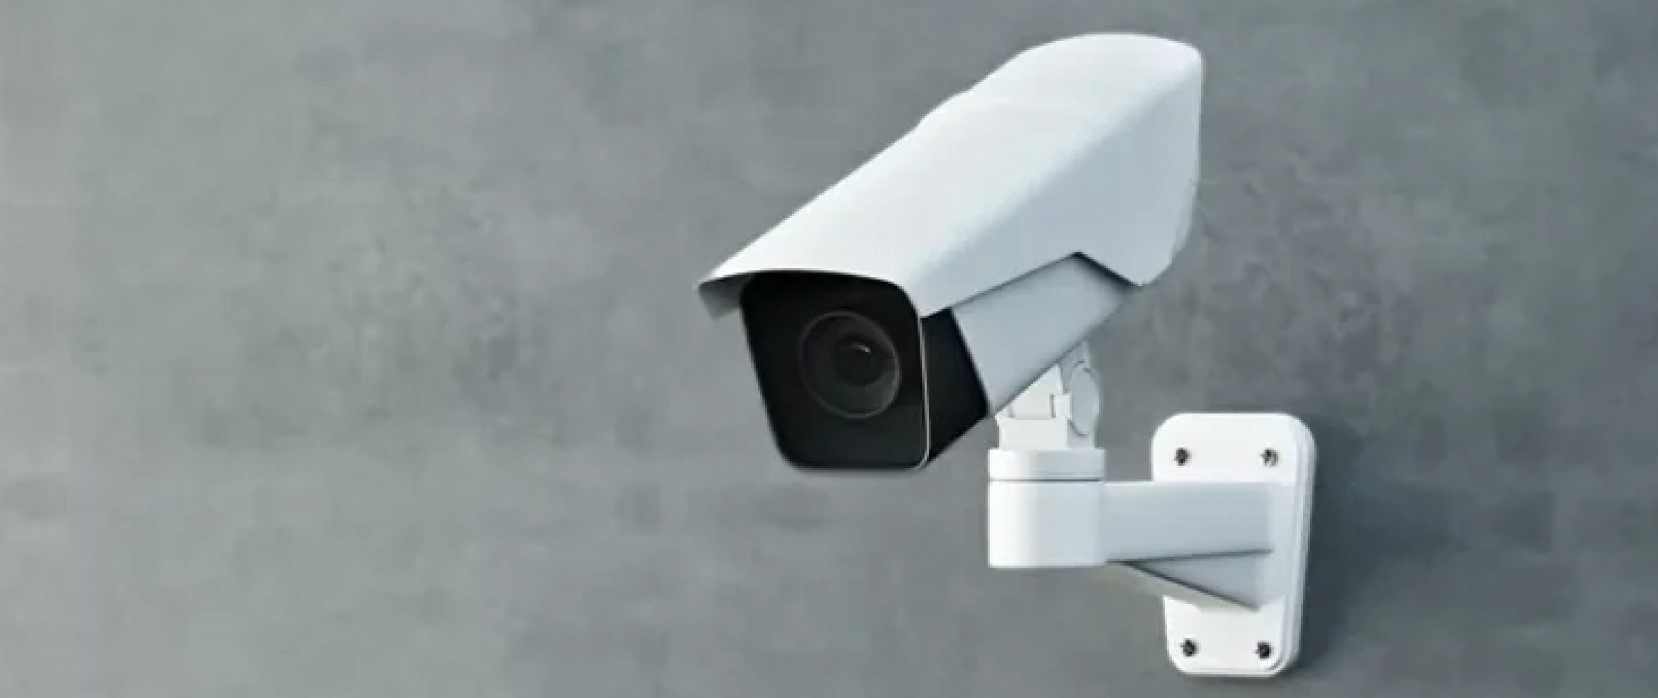

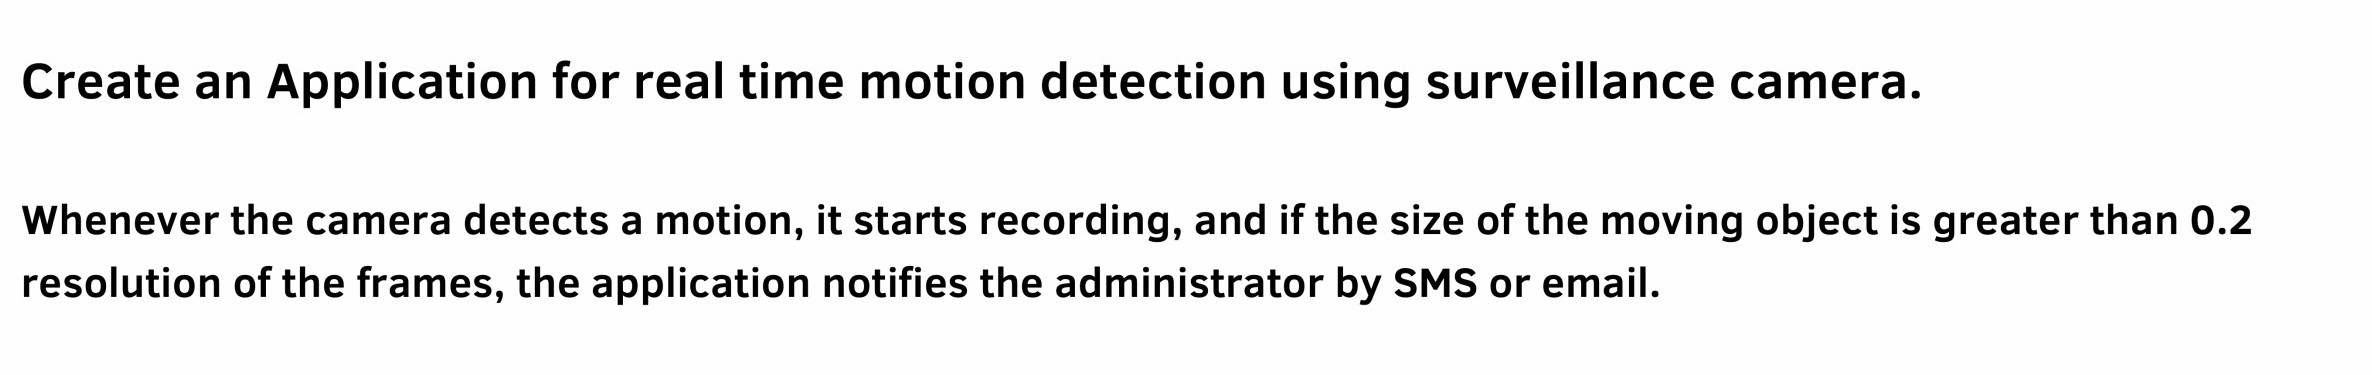

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> How to send gmail notification? </p>

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 1:
</span>

To fill the "Sender's gmail Address Password", you should enter the app password. The app password is the 16-character code. To create an app password, you need 2-Step Verification on your Google Account:

* Go to your Google Account.
* Select Security.
* Under "Signing in to Google," select 2-Step Verification.
* At the bottom of the page, select App passwords.
* Enter a name that helps you remember where you’ll use the app password.
* Select Generate.
* Select Done.

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 2: 
</span> 

In order to send gmail notification the Internet should be on.

<span style="color:red;font-weight:700;font-size:25px">
    &#10148; Note 3: 
</span> 

In order to send gmail notification, please follow the instructions below:
* Install yagmail 
* yagmail is a GMAIL/SMTP client that aims to make it as simple as possible to send emails.

In [10]:

#####----------------------------Installing yagmail and its packages---------------------------#####
!pip install yagmail

In [11]:

#####----------------------------Importing yagmail and its packages---------------------------#####

import yagmail

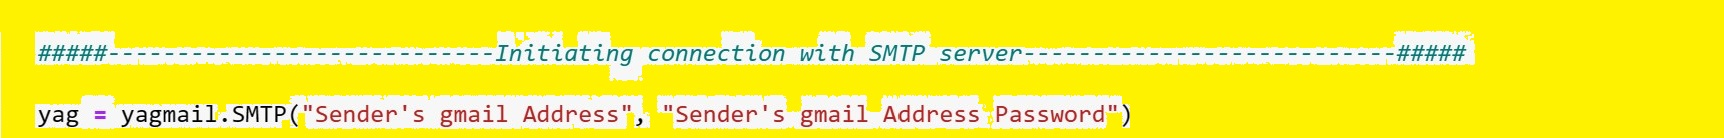

In [12]:
yag = yagmail.SMTP ("Sender's gmail Address" , "Sender's gmail Address Password")

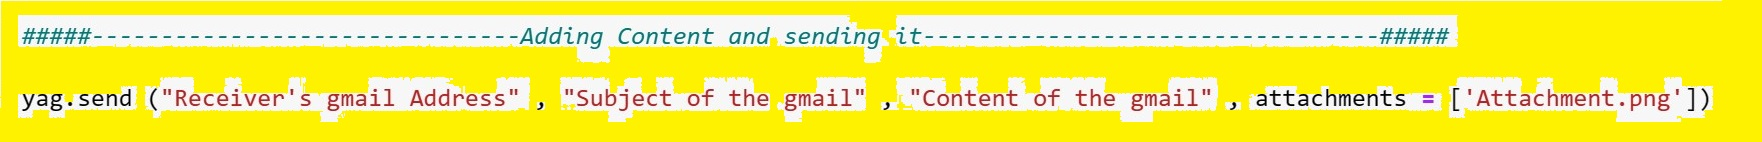

In [13]:
yag.send("Receiver's gmail Address", "Email Notification", "A motion is just detected")

{}

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> How to get current date and time? </p>

In [17]:
# Get the current date and time
from datetime import datetime

#now = datetime.now()

#now = datetime.now().replace (microsecond = 0)

#now = datetime.now().time()

now = datetime.now().time().replace (microsecond = 0)

print("Date and Time =", now)

Date and Time = 16:17:00


# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> How to send gmail notification containing current date and time? </p>

In [18]:
import yagmail

# Get the current date and time
from datetime import datetime

yag = yagmail.SMTP ("Sender's gmail Address" , "Sender's gmail Address Password")

body = 'A motion is just detected at {}. \nRecording is started.'.format (datetime.now ().time().replace (microsecond = 0))
body += '\n\nDate and Time: %s' % str (datetime.now ().replace (microsecond = 0))

yag.send ("Receiver's gmail Address" , "Email Notification" , body)

print (body)

A motion is just detected at 16:17:47. 
Recording is started.

Date and Time: 2023-08-29 16:17:47


# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> Resizres the given image  </p>

In [19]:
####--------------------Defining a function to resizres the given image--------------------####
    
def resize_img (img , scale_precent):
    """
    This function resizres the given image.
    """
    width = int (img.shape[1]*scale_precent/100)
    hight = int (img.shape[0]*scale_precent/100)
    dim = (width , hight)
    resized = cv2.resize (img , dim)
    return resized

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> Capture the Video Stream </p>

In [20]:
import cv2

cam = cv2.VideoCapture(0)                            # Connect to the default camera

while True:
    
    ret, frame1 = cam.read()                         # Read a frame from the video stream
    
    frame1_resized = resize_img(frame1, 40)          # Resize the frame 
    
    
    cv2.imshow('Video Stream', frame1_resized)       # Display the resized frame in a window
    
    if cv2.waitKey(1) == ord('q'):                   # Exit if the 'q' key is pressed
        break
              
cam.release()                                        # Release the camera

cv2.destroyAllWindows()                              # Close all windows

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> Fetching the fps, dimensions, and resolution  </p>

In [21]:

####-------------------------------Fetching the fps-------------------------------------####

cam = cv2.VideoCapture(0)

fps = cam.get(cv2.CAP_PROP_FPS)

print ("Frames per second: " + str (fps))

Frames per second: 30.0


In [22]:

####---------------------------------Fetching dimensions----------------------------------####

print(frame1.shape)

print(frame1_resized.shape)

(1080, 1920, 3)
(432, 768, 3)


In [23]:
####------------------------Fetching the resolution of the cam----------------------------####

width = int (cam.get(3))  # ID number for width is 3 ---  convert them from float to integer

height = int (cam.get(4)) # ID number for height is 4

print ("Resolution of the cam is: " + str (width) + "x" + str (height) + ".")

Resolution of the cam is: 1920x1080.


In [24]:
####---------------------Fetching the resolution of the resized image----------------------####

wid = frame1_resized.shape[1]
hgt = frame1_resized.shape[0]

# Displaying the dimensions
print ("Resolution of the resized image is:" , str (wid) + "x" + str (hgt) + ".")

Resolution of the resized image is: 768x432.


# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> How to save the video? </p>

In [26]:
import cv2

cam = cv2.VideoCapture(0)                            

# Defining the codec and create VideoWriter object - encode the video in Python
fourcc = cv2.VideoWriter_fourcc (*'X264')   # (*'MP4v') or ('M', 'P', '4', 'v')

# cv2.VideoWriter("/your path/filename.mp4",fourcc, fps, (w, h))
out = cv2.VideoWriter ('C:/Users/DearUser/Desktop/output.mp4' , fourcc , 20.0 , (768 , 432))


while True:
    
    ret, frame1 = cam.read()                         
    frame1_resized = resize_img(frame1, 40)          
    
    out.write (frame1_resized)   # Write the frame into the file 'output.mp4'
    
    cv2.imshow('Video Stream', frame1_resized)       
    if cv2.waitKey(1) == ord('q'):                   
        break
        
cam.release()   

out.release ()  # Releasing the recorded movie

cv2.destroyAllWindows()                              

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> Motion Detection Step by Step</p>

In [27]:
####--------------------Defining a function to resizres the given image--------------------####
    
def resize_img (img , scale_precent):
    """
    This function resizres the given image.
    """
    width = int (img.shape[1]*scale_precent/100)
    hight = int (img.shape[0]*scale_precent/100)
    dim = (width , hight)
    resized = cv2.resize (img , dim)
    return resized

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 1: Frame Differencing
</span>

In [28]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    #  absolute value of the difference or absolute differences
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # display the webcam video feed
    cv2.imshow('Webcam', diff)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 2: Converting to Gray
</span>

In [29]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # Convert to gray 
    gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
         
    # display the webcam video feed
    cv2.imshow('Webcam', gray)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 3: Image Smoothing or Blurring
</span>

In [30]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # Convert to gray color
    gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    
    # Convert to blur
    #cv2.GaussianBlur(frame, (kernelSize,kernelSize), sigmaX, sigmaY)
    # We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.
    # If only sigmaX is specified, sigmaY is taken as the same as sigmaX.
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
         
    # display the webcam video feed
    cv2.imshow('Webcam', blur)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 4: Applying Threshold
</span>

In [31]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # Convert to gray color
    gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    
    # Convert to blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Applying threshold and converts it to black & white image
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
         
    # display the webcam video feed
    cv2.imshow('Webcam', thresh)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 5: Dilation
</span>

In [32]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # convert to gray color
    gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    
    # convert to blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Applying threshold and converts it to black & white image
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    
    # Dilation 
    dilated = cv2.dilate(thresh, None, iterations=3)

         
    # display the webcam video feed
    cv2.imshow('Webcam', dilated)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 6: Find Contours 
</span>

In [33]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # convert to gray color
    gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    
    # convert to blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Applies Threshold and converts it to black & white image
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    
    # create a dilation 
    dilated = cv2.dilate(thresh, None, iterations=3)
    
    # create contours
    # Use Find Contours To Detect Coordinates Of The Moving Objects.
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(frame1_resized, contours, -1, (0, 255, 0), 2)

         
    # display the webcam video feed
    cv2.imshow('Webcam', frame1_resized)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 7: Draw Bounding Box Around Contours
</span>

In [36]:
import cv2
 
# capture the video-feed from the webcam
cam = cv2.VideoCapture(0)
 
while(True):
    
    ret, frame1 = cam.read()
    frame1_resized = resize_img(frame1, 40)
    
    ret, frame2 = cam.read()
    frame2_resized = resize_img(frame2, 40)
    
    # Frame Differencing
    diff = cv2.absdiff(frame1_resized, frame2_resized)
    
    # convert to gray color
    gray = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    
    # convert to blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Applies Threshold and converts it to black & white image
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    
    # create a dilation 
    dilated = cv2.dilate(thresh, None, iterations=3)
    
    # create contours
    # Use Find Contours To Detect Coordinates Of The Moving Objects.
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    #The above line doesn't give a rectangular boarder, so to do this, we...
    # Creating a for-loop
    for c in contours:
        
        # Checks if the area is big enough to be considered as motion.
        # Ignoring small contours
        threshold_area = 3000
        area = cv2.contourArea (c)
        if area < threshold_area:
            continue
            
        # Drawing bounding box around contours
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(frame1_resized, (x, y), (x+w, y+h), (250, 0, 250), 3)
                
         
    # display the webcam video feed
    cv2.imshow('Webcam', frame1_resized)
 
    #break the loop when 'q' is pressed.
    if cv2.waitKey(1) & 0xFF == ord('q'):
       break
         
cam.release()
cv2.destroyAllWindows()

<span style="color:Blue;font-weight:700;font-size:25px">
    &#10148; Step 8: 
</span>

In [37]:
(0.2*(432*768))

66355.2

In [38]:
# Importing OpenCV 
import cv2

# Importing the
import winsound

# capture the video-feed from the webcam
cam = cv2.VideoCapture (0)


# Using infinite loop to capture the frames from the video 
while (True):
    
    # Using the read method to capture the video frames
    ret, frame1 = cam.read ()
    frame1_resized = resize_img (frame1 , 40)
       
    ret, frame2 = cam.read ()
    frame2_resized = resize_img (frame2 , 40)
    
    # Subtracting the frames 
    diff = cv2.absdiff (frame1_resized , frame2_resized)
    
    # Converting to gray color
    gray = cv2.cvtColor (diff , cv2.COLOR_RGB2GRAY)
    
    # Converting to blur
    blur = cv2.GaussianBlur (gray , (5 , 5) , 0)
    
    # Creating a threshold 
    _, thresh = cv2.threshold (blur , 20 , 255 , cv2.THRESH_BINARY)
    
    # Creating a dilation - remove the noise
    dilated = cv2.dilate (thresh , None , iterations = 3)
    
    # Creating contours
    contours, _ = cv2.findContours (dilated , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    
    # Creating a for-loop
    for c in contours:
        
        # Ignoring small contours
        # #Checks if the area is big enough to be considered as motion.
        threshold_area = 3000
        area = cv2.contourArea (c)
        if area < threshold_area:
            continue
            
        # Drawing bounding box around contour
        x, y, w, h = cv2.boundingRect (c)
        cv2.rectangle (frame1_resized , (x , y) , (x+w , y+h) , (250 , 0 , 250) , 3)
            
        if area > (0.2*(432*768)):    
            winsound.Beep (600 , 300)
            winsound.PlaySound ('sound.wav' , winsound.SND_ASYNC)

    
    # Displaying the webcam video feed
    cv2.imshow ('Webcam' , frame1_resized)
 
    # Breaking the loop when 'q' is pressed.
    if cv2.waitKey (1) & 0xFF == ord ('q'):
        break


# Releasing the camera
cam.release ()

# Closing all windows
cv2.destroyAllWindows ()

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> Final Code</p>

In [39]:
 
#####--------------------------------Importing libraries-----------------------------------####
    
# Importing OpenCV 
import cv2

# Importing the datetime function of the datetime module  
from datetime import datetime

# Importing the
import winsound

####--------------------Defining a function to resizres the given image--------------------####
    
def resize_img (img , scale_precent):
    """
    This function resizres the given image.
    """
    width = int (img.shape[1]*scale_precent/100)
    hight = int (img.shape[0]*scale_precent/100)
    dim = (width , hight)
    resized = cv2.resize (img , dim)
    return resized

####-----------------------------------Motion Detection ------------------------------------####
    
# capture the video-feed from the webcam
cam = cv2.VideoCapture (0)

if not cam.isOpened ():
        print ("Error starting video capture!")
        
detected_motion = False
frame_rec_count = 0

# Defining the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc (*'X264')

# FPS set to 20 
# cv2.VideoWriter("/your path/filename.mp4",fourcc, fps, (w, h))
out = cv2.VideoWriter ('C:/Users/DearUser/Desktop/output.mp4' , fourcc , 20.0 , (768 , 432))

# Using infinite loop to capture the frames from the video 
while (True):
    
    # Using the read method to capture the video frames
    ret, frame1 = cam.read ()
    frame1_resized = resize_img (frame1 , 40)
       
    ret, frame2 = cam.read ()
    frame2_resized = resize_img (frame2 , 40)
    
    # Subtracting the frames
    diff = cv2.absdiff (frame1_resized , frame2_resized)
    
    # Converting to gray color
    gray = cv2.cvtColor (diff , cv2.COLOR_RGB2GRAY)
    
    # Converting to blur
    blur = cv2.GaussianBlur (gray , (5 , 5) , 0)
    
    # Creating a threshold 
    _, thresh = cv2.threshold (blur , 20 , 255 , cv2.THRESH_BINARY)
    
    # Creating a dilation - remove the noise
    dilated = cv2.dilate (thresh , None , iterations = 3)
    
    # Creating contours
    contours, _ = cv2.findContours (dilated , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    
    # Creating a for-loop
    for c in contours:
        
        # Ignoring small contours
        threshold_area = 2000 
        area = cv2.contourArea (c)
        if area < threshold_area:
            continue
            
        # Drawing bounding box around contour
        x, y, w, h = cv2.boundingRect (c)
        cv2.rectangle (frame1_resized , (x , y) , (x+w , y+h) , (250 , 0 , 250) , 3)
        
        detected_motion = True
        
        print("Motion is detected at {}. Recording is started.".format (datetime.now().time().replace(microsecond=0))) 
        
        if detected_motion:
            out.write (frame1_resized)
            frame_rec_count = frame_rec_count + 1
             
        if area > (0.2*(432*768)):    
            winsound.Beep (600 , 300)
            winsound.PlaySound ('sound.wav' , winsound.SND_ASYNC)
            
            print ("The size of the moving object is greater than 0.2 resolution of the frames. An email alert is sent.") 
            
            ####---------------------Creating and sending the Email notification-----------------------####
            # importing yagmail and its packages        
            import yagmail

            ####initiating connection with SMTP server
            yag = yagmail.SMTP("Sender's gmail Address", "Sender's gmail Address Password")

            # Adding Content and sending it
            body = 'A motion is just detected at {}. \nRecording is started.'.format (datetime.now().time().replace(microsecond=0))
            body += '\n\nTime: %s' % str(datetime.now())
            yag.send("Receiver's gmail Address", "Email notification", body)
            ####---------------------------------------------------------------------------------------####
    
    
    # Displaying the webcam video feed
    cv2.imshow ('Webcam' , frame1_resized)
 
    # Breaking the loop when 'q' is pressed.
    if cv2.waitKey (1) & 0xFF == ord ('q') or frame_rec_count == 10:
        break

####---------------------Fetching the fps, dimensions, and resolution----------------------####

fps = cam.get (cv2.CAP_PROP_FPS)
width = int (cam.get(3))  # ID number for width is 3
height = int (cam.get(4)) # ID number for height is 4
print ("Frames per second: " + str (fps) + ". Resolution of the cam is: " + str (width) + "x" + str (height) + ".")

####---------------------Fetching the fps, dimensions, and resolution----------------------####

wid = frame1_resized.shape[1]
hgt = frame1_resized.shape[0]
# Displaying the dimensions
print ("Resolution of the resized image is:" , str (wid) + "x" + str (hgt) + ".")

####----------Releasing the camera & the recorded movie and closing all windows-----------####

# Releasing the camera
cam.release ()
# Releasing the recorded movie
out.release ()
# Closing all windows
cv2.destroyAllWindows ()

Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:16. Recording is started.
Motion is detected at 16:34:17. Recording is started.
Motion is detected at 16:34:17. Recording is started.
Motion is detected at 16:34:17. Recording is started.
Motion is detected at 16:34:17. Recording is started.
Motion is detected at 16:34:17. Recording is started.
Motion is detected at 16:34:

# <p style="background-color:LimeGreen ;font-family:newtimeroman;color:black ;font-size:125%;text-align:center;border-radius:5px 5px;"> Final Code</p>

In [40]:
 
#####--------------------------------Importing libraries-----------------------------------####
    
# Importing OpenCV 
import cv2

# Importing the datetime function of the datetime module  
from datetime import datetime

# Importing the
import winsound

####--------------------Defining a function to resizres the given image--------------------####
    
def resize_img (img , scale_precent):
    """
    This function resizres the given image.
    """
    width = int (img.shape[1]*scale_precent/100)
    hight = int (img.shape[0]*scale_precent/100)
    dim = (width , hight)
    resized = cv2.resize (img , dim)
    return resized

####-----------------------------------Motion Detection ------------------------------------####
    
# capture the video-feed from the webcam
cam = cv2.VideoCapture (0)

if not cam.isOpened ():
        print ("Error starting video capture!")
        
detected_motion = False
frame_rec_count = 0

# Defining the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc (*'X264')

# FPS set to 20 
# cv2.VideoWriter("/your path/filename.mp4",fourcc, fps, (w, h))
out = cv2.VideoWriter ('C:/Users/DearUser/Desktop/output.mp4' , fourcc , 20.0 , (768 , 432))

# Using infinite loop to capture the frames from the video 
while (True):
    
    # Using the read method to capture the video frames
    ret, frame1 = cam.read ()
    frame1_resized = resize_img (frame1 , 40)
       
    ret, frame2 = cam.read ()
    frame2_resized = resize_img (frame2 , 40)
    
    # Subtracting the frames 
    diff = cv2.absdiff (frame1_resized , frame2_resized)
    
    # Converting to gray color
    gray = cv2.cvtColor (diff , cv2.COLOR_RGB2GRAY)
    
    # Converting to blur
    blur = cv2.GaussianBlur (gray , (5 , 5) , 0)
    
    # Creating a threshold 
    _, thresh = cv2.threshold (blur , 20 , 255 , cv2.THRESH_BINARY)
    
    # Creating a dilation - remove the noise
    dilated = cv2.dilate (thresh , None , iterations = 3)
    
    # Creating contours
    contours, _ = cv2.findContours (dilated , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)
    
    # Creating a for-loop
    for c in contours:
        
        # Ignoring small contours
        # #Checks if the area is big enough to be considered as motion.
        threshold_area = 2000 
        area = cv2.contourArea (c)
        if area < threshold_area:
            continue
            
        # Drawing bounding box around contour
        x, y, w, h = cv2.boundingRect (c)
        cv2.rectangle (frame1_resized , (x , y) , (x+w , y+h) , (250 , 0 , 250) , 3)
        
        detected_motion = True
        
        if detected_motion:
            out.write (frame1_resized)
            frame_rec_count = frame_rec_count + 1
             
        if area > (0.2*(432*768)):    
            winsound.Beep (600 , 300)
            winsound.PlaySound ('sound.wav' , winsound.SND_ASYNC)

    
    # Displaying the webcam video feed
    cv2.imshow ('Webcam' , frame1_resized)
 
    # Breaking the loop when 'q' is pressed.
    if cv2.waitKey (1) & 0xFF == ord ('q'):
        break

####---------------------Fetching the fps, dimensions, and resolution----------------------####

fps = cam.get (cv2.CAP_PROP_FPS)
width = int (cam.get(3))  # ID number for width is 3
height = int (cam.get(4)) # ID number for height is 4
print ("Frames per second: " + str (fps) + ". Resolution of the cam is: " + str (width) + "x" + str (height) + ".")

####---------------------Fetching the fps, dimensions, and resolution----------------------####

wid = frame1_resized.shape[1]
hgt = frame1_resized.shape[0]
# Displaying the dimensions
print ("Resolution of the resized image is:" , str (wid) + "x" + str (hgt) + ".")


print("Motion is detected at {}. Recording is started.".format (datetime.now().time().replace(microsecond=0)))             
print ("The size of the moving object is greater than 0.2 resolution of the frames. An email alert is sent.") 
                       
####---------------------Creating and sending the Email notification-----------------------####
# importing yagmail and its packages        
import yagmail

####initiating connection with SMTP server
yag = yagmail.SMTP("Sender's gmail Address", "Sender's gmail Address Password")

# Adding Content and sending it
body = 'A motion is just detected at {}. \nRecording is started.'.format (datetime.now().time().replace(microsecond=0))
body += '\n\nTime: %s' % str(datetime.now())
yag.send("Receiver's gmail Address", "Email notification", body)
       
####----------Releasing the camera & the recorded movie and closing all windows-----------####

# Releasing the camera
cam.release ()

# Releasing the recorded movie
out.release ()

# Closing all windows
cv2.destroyAllWindows ()

Frames per second: 30.0. Resolution of the cam is: 1920x1080.
Resolution of the resized image is: 768x432.
Motion is detected at 16:34:48. Recording is started.
The size of the moving object is greater than 0.2 resolution of the frames. An email alert is sent.
